In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# ------------------------------------------------------------------------------
# Step 1: Import Required Libraries
# ------------------------------------------------------------------------------

import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import random

C:\Users\SHYAM\AppData\Local\Programs\Python\Python310\lib\site-packages\google\api_core\_python_version_support.py:266: FutureWarning: You are using a Python version (3.10.9) which Google will stop supporting in new releases of google.api_core once it reaches its end of life (2026-10-04). Please upgrade to the latest Python version, or at least Python 3.11, to continue receiving updates for google.api_core past that date.
  warnings.warn(message, FutureWarning)


In [3]:
# ------------------------------------------------------------------------------
# Step 2: Load and Prepare Dataset
# ------------------------------------------------------------------------------

print("Loading CIFAR-10 dataset...")
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to [0,1]
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32')  / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

# Class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

print(f"Training shape: {x_train.shape}")
print(f"Test shape: {x_test.shape}")

Loading CIFAR-10 dataset...
Training shape: (50000, 32, 32, 3)
Test shape: (10000, 32, 32, 3)


In [4]:
# ------------------------------------------------------------------------------
# Step 3: Data Augmentation (Improves Generalization)
# ------------------------------------------------------------------------------

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

datagen.fit(x_train)

print("Data augmentation configured.")


Data augmentation configured.


In [5]:
# ------------------------------------------------------------------------------
# Step 4: Build CNN Model
# ------------------------------------------------------------------------------

model = models.Sequential([

    layers.Input(shape=(32, 32, 3)),

    # Block 1
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    # Block 2
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.3),

    # Block 3
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.4),

    # Fully Connected
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    # Output Layer
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 256)                 │           1,0

 Total params: 668,842 (2.55 MB)

 Trainable params: 667,690 (2.55 MB)

 Non-trainable params: 1,152 (4.50 KB)

In [6]:
# ------------------------------------------------------------------------------
# Step 5: Compile Model
# ------------------------------------------------------------------------------

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Model compiled successfully.")

Model compiled successfully.


In [7]:
# ------------------------------------------------------------------------------
# Step 6: Train Model
# ------------------------------------------------------------------------------

# Callbacks for better training
checkpoint = callbacks.ModelCheckpoint(
    "best_cifar10_model.h5",
    monitor="val_accuracy",
    save_best_only=True,
    verbose=1
)

early_stop = callbacks.EarlyStopping(
    monitor="val_loss",
    patience=7,
    restore_best_weights=True
)

reduce_lr = callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.5,
    patience=3,
    min_lr=1e-5,
    verbose=1
)

print("Training the model...")

history = model.fit(
    datagen.flow(x_train, y_train, batch_size=128),
    epochs=40,
    validation_data=(x_test, y_test),
    callbacks=[checkpoint, early_stop, reduce_lr],
    verbose=1
)

Training the model...
Epoch 1/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step - accuracy: 0.3160 - loss: 2.2065
Epoch 1: val_accuracy improved from None to 0.20830, saving model to best_cifar10_model.h5


391/391 ━━━━━━━━━━━━━━━━━━━━ 132s 330ms/step - accuracy: 0.3845 - loss: 1.8375 - val_accuracy: 0.2083 - val_loss: 3.1109 - learning_rate: 0.0010
Epoch 2/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step - accuracy: 0.5034 - loss: 1.3763
Epoch 2: val_accuracy improved from 0.20830 to 0.57290, saving model to best_cifar10_model.h5


391/391 ━━━━━━━━━━━━━━━━━━━━ 185s 473ms/step - accuracy: 0.5292 - loss: 1.3073 - val_accuracy: 0.5729 - val_loss: 1.2544 - learning_rate: 0.0010
Epoch 3/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step - accuracy: 0.5921 - loss: 1.1504
Epoch 3: val_accuracy improved from 0.57290 to 0.67500, saving model to best_cifar10_model.h5


391/391 ━━━━━━━━━━━━━━━━━━━━ 193s 493ms/step - accuracy: 0.6038 - loss: 1.1143 - val_accuracy: 0.6750 - val_loss: 0.9283 - learning_rate: 0.0010
Epoch 4/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step - accuracy: 0.6353 - loss: 1.0329
Epoch 4: val_accuracy did not improve from 0.67500
391/391 ━━━━━━━━━━━━━━━━━━━━ 208s 506ms/step - accuracy: 0.6411 - loss: 1.0143 - val_accuracy: 0.6548 - val_loss: 0.9882 - learning_rate: 0.0010
Epoch 5/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 563ms/step - accuracy: 0.6603 - loss: 0.9582
Epoch 5: val_accuracy did not improve from 0.67500
391/391 ━━━━━━━━━━━━━━━━━━━━ 261s 669ms/step - accuracy: 0.6646 - loss: 0.9456 - val_accuracy: 0.6503 - val_loss: 1.0056 - learning_rate: 0.0010
Epoch 6/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 731ms/step - accuracy: 0.6818 - loss: 0.9052
Epoch 6: val_accuracy did not improve from 0.67500

Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
391/391 ━━━━━━━━━━━━━━━━━━━━ 297s 758ms/step - accuracy: 0.6841 - loss:

391/391 ━━━━━━━━━━━━━━━━━━━━ 149s 381ms/step - accuracy: 0.7070 - loss: 0.8315 - val_accuracy: 0.7189 - val_loss: 0.7914 - learning_rate: 5.0000e-04
Epoch 8/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - accuracy: 0.7213 - loss: 0.8008
Epoch 8: val_accuracy did not improve from 0.71890
391/391 ━━━━━━━━━━━━━━━━━━━━ 117s 300ms/step - accuracy: 0.7212 - loss: 0.8004 - val_accuracy: 0.7124 - val_loss: 0.8265 - learning_rate: 5.0000e-04
Epoch 9/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step - accuracy: 0.7245 - loss: 0.7842
Epoch 9: val_accuracy did not improve from 0.71890
391/391 ━━━━━━━━━━━━━━━━━━━━ 130s 332ms/step - accuracy: 0.7249 - loss: 0.7853 - val_accuracy: 0.7124 - val_loss: 0.8376 - learning_rate: 5.0000e-04
Epoch 10/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step - accuracy: 0.7338 - loss: 0.7715
Epoch 10: val_accuracy did not improve from 0.71890

Epoch 10: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
391/391 ━━━━━━━━━━━━━━━━━━━━ 175s 416ms/step - accuracy:

391/391 ━━━━━━━━━━━━━━━━━━━━ 163s 405ms/step - accuracy: 0.7490 - loss: 0.7111 - val_accuracy: 0.7556 - val_loss: 0.6949 - learning_rate: 2.5000e-04
Epoch 13/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step - accuracy: 0.7584 - loss: 0.6901
Epoch 13: val_accuracy improved from 0.75560 to 0.75730, saving model to best_cifar10_model.h5


391/391 ━━━━━━━━━━━━━━━━━━━━ 142s 363ms/step - accuracy: 0.7559 - loss: 0.6999 - val_accuracy: 0.7573 - val_loss: 0.6962 - learning_rate: 2.5000e-04
Epoch 14/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step - accuracy: 0.7577 - loss: 0.6931
Epoch 14: val_accuracy improved from 0.75730 to 0.77170, saving model to best_cifar10_model.h5


391/391 ━━━━━━━━━━━━━━━━━━━━ 142s 364ms/step - accuracy: 0.7591 - loss: 0.6917 - val_accuracy: 0.7717 - val_loss: 0.6535 - learning_rate: 2.5000e-04
Epoch 15/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step - accuracy: 0.7577 - loss: 0.6920
Epoch 15: val_accuracy did not improve from 0.77170
391/391 ━━━━━━━━━━━━━━━━━━━━ 145s 371ms/step - accuracy: 0.7632 - loss: 0.6792 - val_accuracy: 0.7589 - val_loss: 0.6968 - learning_rate: 2.5000e-04
Epoch 16/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step - accuracy: 0.7661 - loss: 0.6743
Epoch 16: val_accuracy improved from 0.77170 to 0.77800, saving model to best_cifar10_model.h5


391/391 ━━━━━━━━━━━━━━━━━━━━ 202s 370ms/step - accuracy: 0.7657 - loss: 0.6734 - val_accuracy: 0.7780 - val_loss: 0.6390 - learning_rate: 2.5000e-04
Epoch 17/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step - accuracy: 0.7685 - loss: 0.6662
Epoch 17: val_accuracy did not improve from 0.77800
391/391 ━━━━━━━━━━━━━━━━━━━━ 141s 361ms/step - accuracy: 0.7698 - loss: 0.6662 - val_accuracy: 0.7660 - val_loss: 0.6799 - learning_rate: 2.5000e-04
Epoch 18/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step - accuracy: 0.7708 - loss: 0.6581
Epoch 18: val_accuracy did not improve from 0.77800
391/391 ━━━━━━━━━━━━━━━━━━━━ 144s 367ms/step - accuracy: 0.7712 - loss: 0.6573 - val_accuracy: 0.7746 - val_loss: 0.6420 - learning_rate: 2.5000e-04
Epoch 19/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step - accuracy: 0.7754 - loss: 0.6418
Epoch 19: val_accuracy improved from 0.77800 to 0.79130, saving model to best_cifar10_model.h5


391/391 ━━━━━━━━━━━━━━━━━━━━ 198s 356ms/step - accuracy: 0.7740 - loss: 0.6472 - val_accuracy: 0.7913 - val_loss: 0.6016 - learning_rate: 2.5000e-04
Epoch 20/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step - accuracy: 0.7768 - loss: 0.6428
Epoch 20: val_accuracy did not improve from 0.79130
391/391 ━━━━━━━━━━━━━━━━━━━━ 142s 362ms/step - accuracy: 0.7764 - loss: 0.6431 - val_accuracy: 0.7803 - val_loss: 0.6299 - learning_rate: 2.5000e-04
Epoch 21/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step - accuracy: 0.7817 - loss: 0.6360
Epoch 21: val_accuracy did not improve from 0.79130
391/391 ━━━━━━━━━━━━━━━━━━━━ 144s 367ms/step - accuracy: 0.7793 - loss: 0.6379 - val_accuracy: 0.7612 - val_loss: 0.6957 - learning_rate: 2.5000e-04
Epoch 22/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step - accuracy: 0.7834 - loss: 0.6189
Epoch 22: val_accuracy did not improve from 0.79130

Epoch 22: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
391/391 ━━━━━━━━━━━━━━━━━━━━ 134s 342ms/step - accur

391/391 ━━━━━━━━━━━━━━━━━━━━ 182s 320ms/step - accuracy: 0.7905 - loss: 0.6026 - val_accuracy: 0.7942 - val_loss: 0.5945 - learning_rate: 1.2500e-04
Epoch 25/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step - accuracy: 0.7892 - loss: 0.6007
Epoch 25: val_accuracy improved from 0.79420 to 0.80420, saving model to best_cifar10_model.h5


391/391 ━━━━━━━━━━━━━━━━━━━━ 138s 353ms/step - accuracy: 0.7905 - loss: 0.6013 - val_accuracy: 0.8042 - val_loss: 0.5702 - learning_rate: 1.2500e-04
Epoch 26/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step - accuracy: 0.7940 - loss: 0.5933
Epoch 26: val_accuracy did not improve from 0.80420
391/391 ━━━━━━━━━━━━━━━━━━━━ 144s 368ms/step - accuracy: 0.7906 - loss: 0.5990 - val_accuracy: 0.7911 - val_loss: 0.6009 - learning_rate: 1.2500e-04
Epoch 27/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step - accuracy: 0.7906 - loss: 0.6020
Epoch 27: val_accuracy did not improve from 0.80420
391/391 ━━━━━━━━━━━━━━━━━━━━ 143s 364ms/step - accuracy: 0.7943 - loss: 0.5963 - val_accuracy: 0.7897 - val_loss: 0.6075 - learning_rate: 1.2500e-04
Epoch 28/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step - accuracy: 0.7946 - loss: 0.5901
Epoch 28: val_accuracy did not improve from 0.80420

Epoch 28: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
391/391 ━━━━━━━━━━━━━━━━━━━━ 141s 360ms/step - accura

391/391 ━━━━━━━━━━━━━━━━━━━━ 145s 370ms/step - accuracy: 0.7959 - loss: 0.5850 - val_accuracy: 0.8141 - val_loss: 0.5449 - learning_rate: 6.2500e-05
Epoch 30/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step - accuracy: 0.7986 - loss: 0.5878
Epoch 30: val_accuracy did not improve from 0.81410
391/391 ━━━━━━━━━━━━━━━━━━━━ 137s 351ms/step - accuracy: 0.7995 - loss: 0.5809 - val_accuracy: 0.8039 - val_loss: 0.5672 - learning_rate: 6.2500e-05
Epoch 31/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step - accuracy: 0.7978 - loss: 0.5832
Epoch 31: val_accuracy did not improve from 0.81410
391/391 ━━━━━━━━━━━━━━━━━━━━ 143s 366ms/step - accuracy: 0.8004 - loss: 0.5775 - val_accuracy: 0.8068 - val_loss: 0.5595 - learning_rate: 6.2500e-05
Epoch 32/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step - accuracy: 0.8012 - loss: 0.5736
Epoch 32: val_accuracy did not improve from 0.81410

Epoch 32: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.
391/391 ━━━━━━━━━━━━━━━━━━━━ 133s 339ms/step - accur


Final Test Accuracy: 0.8141 (81.41%)


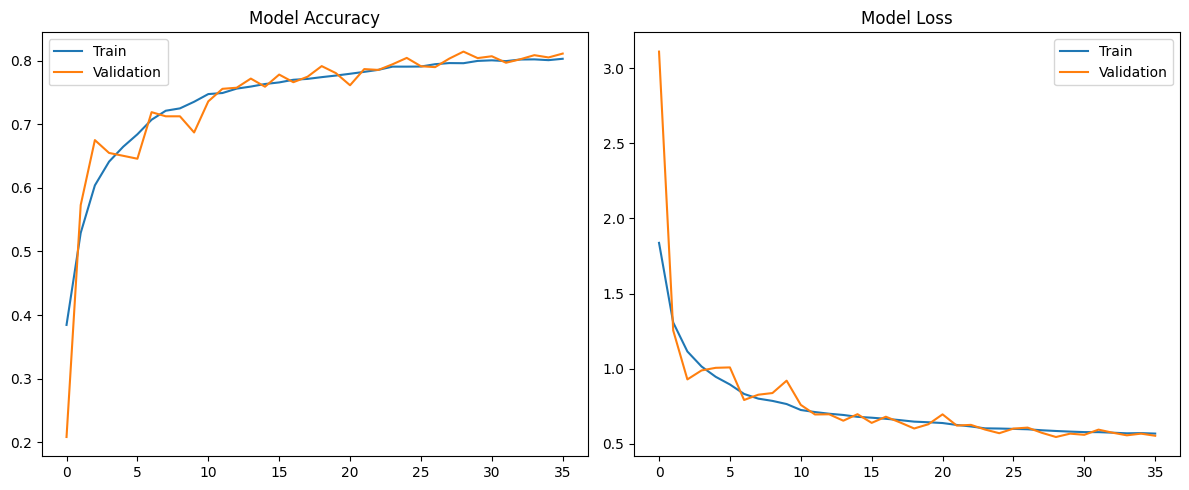

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step

Classification Report:

              precision    recall  f1-score   support

    airplane       0.85      0.84      0.85      1000
  automobile       0.92      0.92      0.92      1000
        bird       0.85      0.65      0.74      1000
         cat       0.77      0.59      0.67      1000
        deer       0.76      0.81      0.79      1000
         dog       0.85      0.65      0.73      1000
        frog       0.62      0.96      0.76      1000
       horse       0.87      0.86      0.87      1000
        ship       0.90      0.92      0.91      1000
       truck       0.85      0.93      0.89      1000

    accuracy                           0.81     10000
   macro avg       0.83      0.81      0.81     10000
weighted avg       0.83      0.81      0.81     10000



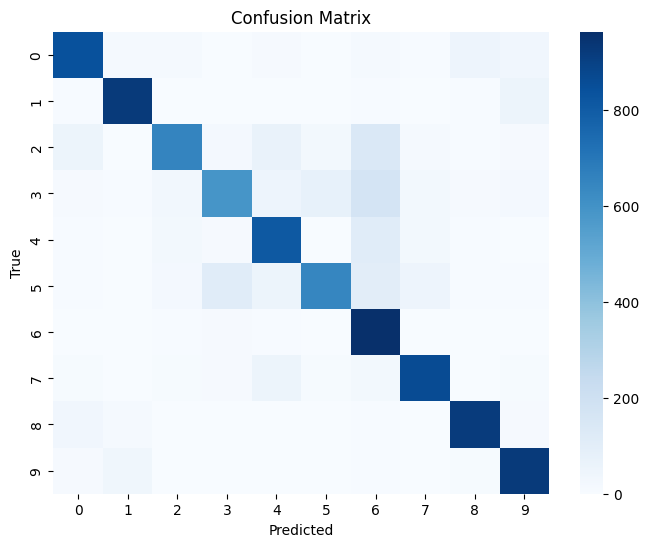

Practical 1 completed successfully.


In [8]:
# ------------------------------------------------------------------------------
# Step 7: Evaluation and Visualization
# ------------------------------------------------------------------------------

# Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\nFinal Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")

# Plot Training Curves
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Classification Report
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=False, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print("Practical 1 completed successfully.")

In [ ]:
num_images = 8
predictions = model.predict(x_test[:num_images])
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test[:num_images], axis=1)

plt.figure(figsize=(15, 8))
for i in range(num_images):
    plt.subplot(2, 4, i+1)
    plt.imshow(x_test[i])
    plt.title(f"Pred: {class_names[predicted_classes[i]]}\nTrue: {class_names[true_classes[i]]}",
              color=("green" if predicted_classes[i] == true_classes[i] else "red"))
    plt.axis('off')
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
